# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 1
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
!pip install ucimlrepo
!pip uninstall scipy
!pip install scipy==1.11.4
!pip install scikit-plot

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.11.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.11.4
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)


In [ ]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
import warnings
import scikitplot as skplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import column_or_1d
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve



In [ ]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [ ]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [ ]:
data.isna().sum()

,0
COMPACTNESS,1
CIRCULARITY,0
DISTANCE CIRCULARITY,0
RADIUS RATIO,0
PR.AXIS ASPECT RATIO,0
MAX.LENGTH ASPECT RATIO,0
SCATTER RATIO,0
ELONGATEDNESS,0
PR.AXIS RECTANGULARITY,0
MAX.LENGTH RECTANGULARITY,0


In [ ]:
index = data.loc[data['COMPACTNESS'].isna() == True].index
data.loc[data['COMPACTNESS'].isna() == True]

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
752,NaN,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200


In [ ]:
data = data.dropna(subset='COMPACTNESS')


In [ ]:
target = target.drop(index = index)

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

Для тестовых данных используем 10% данных, т.к. датасет небольшой

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(760, 18) (760, 1) (85, 18) (85, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# 15 элементов нашего датасета
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
659,96.0,50,94,215,67,9,187,35,22,158,214,525,214,67,8,6,193,201
350,97.0,46,101,210,66,8,192,35,22,151,208,546,169,66,1,32,191,200
727,96.0,44,68,190,70,7,155,41,19,145,179,372,166,67,5,7,202,206
545,88.0,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
805,81.0,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
139,91.0,42,80,162,66,8,148,44,19,145,171,331,147,70,3,5,189,199
72,92.0,39,91,191,62,8,176,37,21,137,196,466,151,67,3,23,192,200
77,86.0,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
514,89.0,38,74,138,59,7,136,49,18,133,167,278,128,72,7,7,189,193
536,102.0,55,101,213,67,12,222,30,25,177,226,719,213,71,2,21,187,199


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,93.648684,44.907895,82.006579,168.539474,61.631579,8.627632,168.710526,40.989474,20.573684,148.140789,188.364474,439.155263,174.850000,72.578947,6.327632,12.456579,188.831579,195.543421
std,8.181827,6.167571,15.853204,33.995520,8.137394,4.802780,33.307928,7.859430,2.594682,14.549898,31.479672,176.842187,32.472526,7.681168,4.835287,8.893497,6.208333,7.510078
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 659 to 102
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       760 non-null    float64
 1   CIRCULARITY                       760 non-null    int64  
 2   DISTANCE CIRCULARITY              760 non-null    int64  
 3   RADIUS RATIO                      760 non-null    int64  
 4   PR.AXIS ASPECT RATIO              760 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           760 non-null    int64  
 6   SCATTER RATIO                     760 non-null    int64  
 7   ELONGATEDNESS                     760 non-null    int64  
 8   PR.AXIS RECTANGULARITY            760 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         760 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  760 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  760 non-null    int64  
 12  SCALED RADI

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
invalid_rows = data[data < 0].any(axis=1)

if invalid_rows.any():
    data = data[~invalid_rows]

Если есть невалидные строки, то мы удаляем их


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Нам необходимо нормализовать данные, т.к. фичи могут быть разных масштабов. Тем самым признаки большого масштаба будут иметь бОльший вклад, хотя на деле это может быть не так

### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
param_grid = {
    'C':[0.01, 0.1, 1, 10],  # Параметр регуляризации
    'penalty': ['l1', 'l2']  # Тип регуляризации
}

In [ ]:
# создаем модель логистической регрессии с параметрами: мультиномиальная логрег
# алгоритм оптимизации - saga
# tolerance (tol) - порог сходимости алгоритма оптимизации
# максимальное количество итераций 500
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# подбираем гиперпараметры при помощи кросс-валидации
# передаем модель, параметры грид серча
# количество фолдов для кросс-валидации
# f1-macro - показатель, по чему будем сравнивать модели
# используем все доступные процессоры
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Предсказание на тестовом наборе
y_pred = best_model.predict(X_test_scaled)

# Оценка качества модели, у каждого класса будет одинаковый показатель
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Подходящие параметры после grid_search: {best_params}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Подходящие параметры после grid_search: {'C': 10, 'penalty': 'l1'}
F1 Score: 0.8619114219114219
Accuracy: 0.8588235294117647


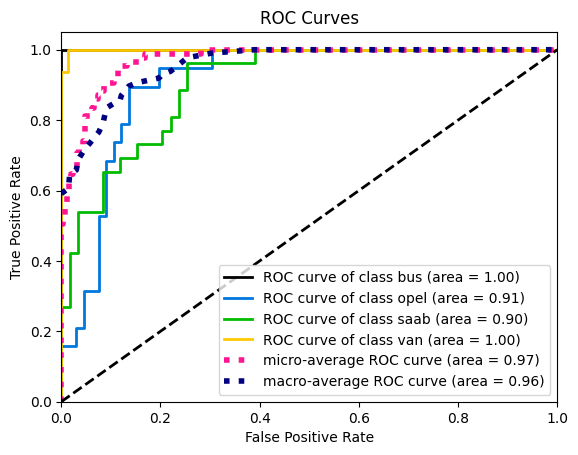

In [ ]:
# Заносим в эту переменную вероятности отношения к классам
y_probas = best_model.predict_proba(X_test_scaled)

skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

Лучше всего различаются классы "bus" и "van"

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

In [ ]:
# Вспоминаем из лекции, что ВСЕГДА НУЖНО НОРМАЛИЗОВАТЬ ДАННЫЕ ПЕРЕД ПРИМЕНЕНИЕМ PCA!!!
# Такое количество компонент, которое объясняет 95% объясненной дисперсии исходных данных
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
print("Количество компонент:", pca.n_components_)
print("Объясненная дисперсия:", pca.explained_variance_ratio_)


Количество компонент: 7
Объясненная дисперсия: [0.52450621 0.16643725 0.10769981 0.06647883 0.04960778 0.02846574
 0.01965834]


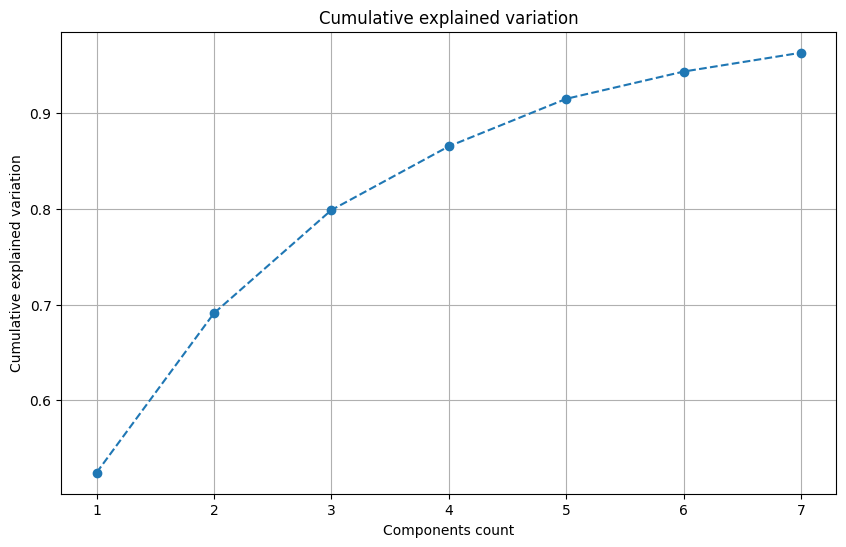

In [ ]:
# Вычисление кумулятивной объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative explained variation')
plt.xlabel('Components count')
plt.ylabel('Cumulative explained variation')
plt.grid(True)
plt.show()


### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [ ]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

Выбрано количество компонент: 7, т.к. это количество объясняет 95% объясненной дисперсии данных

# Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_pca, np.array(y_train).ravel())

print("Оптимальные гиперпараметры:", grid_search.best_params_)


Оптимальные гиперпараметры: {'C': 10, 'penalty': 'l2'}


In [ ]:
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_pca, np.array(y_train).ravel())

y_val_pred = best_logreg.predict(X_val_pca)
y_test_pred = best_logreg.predict(X_test_pca)

f1_val = f1_score(y_val, y_val_pred, average='macro')
accuracy_val = accuracy_score(y_val, y_val_pred)

f1_test = f1_score(y_test, y_test_pred, average='macro')
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"F1 на валидационной части: {f1_val:.4f}")
print(f"Accuracy на валидационной части: {accuracy_val:.4f}")
print(f"F1 на тестовой части: {f1_test:.4f}")
print(f"Accuracy на тестовой части: {accuracy_test:.4f}")

F1 на валидационной части: 0.6675
Accuracy на валидационной части: 0.7143
F1 на тестовой части: 0.7004
Accuracy на тестовой части: 0.6977


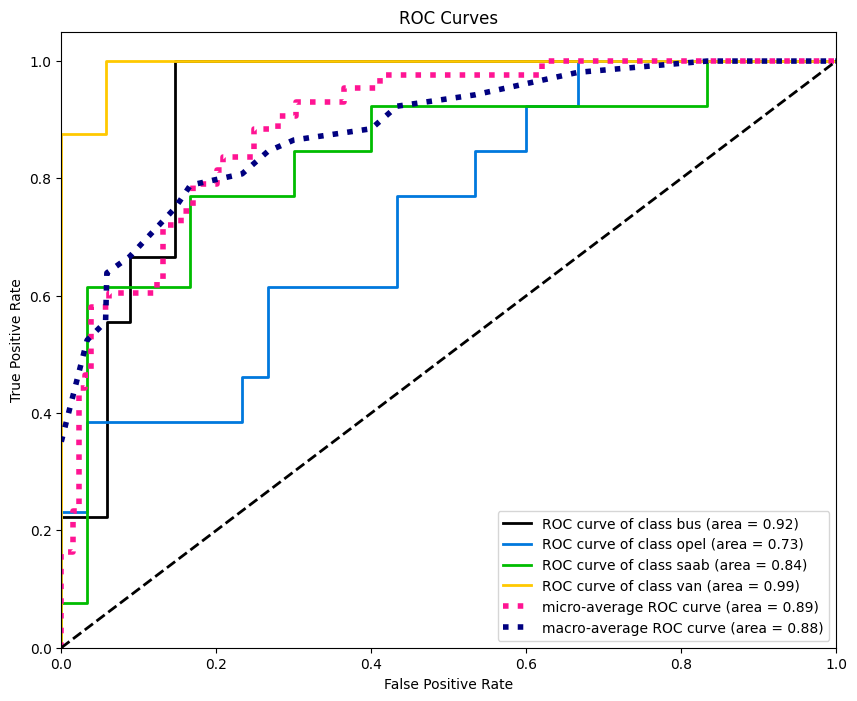

In [ ]:
# Предсказание вероятностей для тестовой части
y_probas = best_logreg.predict_proba(X_test_pca)

# Построение ROC-кривых
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()


Здесь мы уже использовали малость "сжатые" данные, и поэтому наши метрики оказались слабее, чем на исходных данных

### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'max_depth': [10, 20, 30, 40, 50]
}

dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

print("Оптимальные гиперпараметры:", grid_search.best_params_)

best_dtree = grid_search.best_estimator_
best_dtree.fit(X_train_scaled, y_train)

y_test_pred = best_dtree.predict(X_test_scaled)

f1_test = f1_score(y_test, y_test_pred, average='macro')
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"F1 на тестовой части: {f1_test:.4f}")
print(f"Accuracy на тестовой части: {accuracy_test:.4f}")


Оптимальные гиперпараметры: {'max_depth': 10}
F1 на тестовой части: 0.7605
Accuracy на тестовой части: 0.7529


### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

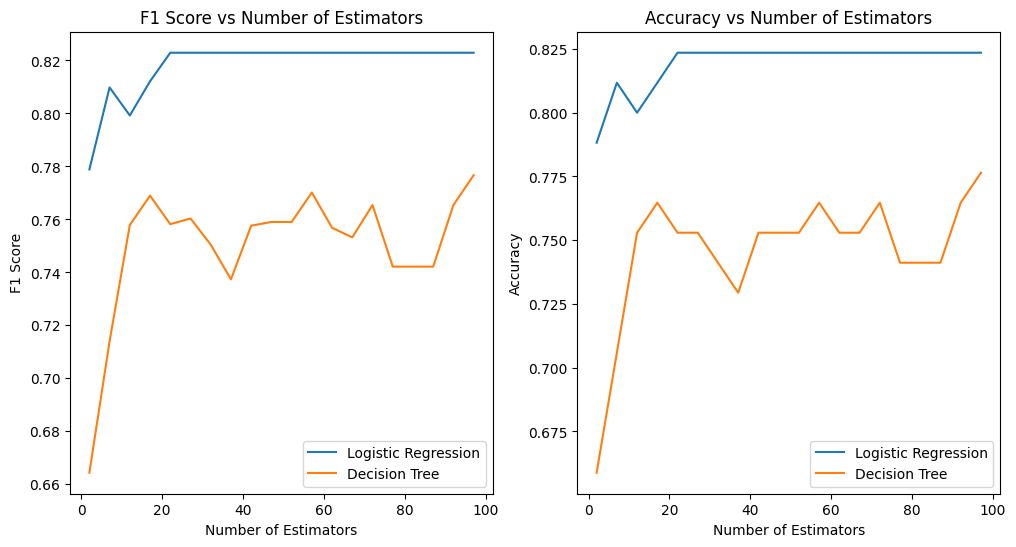

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42, max_depth=10)

f1_scores_logreg = []
accuracy_scores_logreg = []
f1_scores_dtree = []
accuracy_scores_dtree = []

for n_estimators in range(2, 101, 5):
    bagging_logreg = BaggingClassifier(estimator=logreg, n_estimators=n_estimators, random_state=42)
    bagging_logreg.fit(X_train_scaled, np.array(y_train).ravel())
    y_test_pred_logreg = bagging_logreg.predict(X_test_scaled)

    bagging_dtree = BaggingClassifier(estimator=dtree, n_estimators=n_estimators, random_state=42)
    bagging_dtree.fit(X_train_scaled, np.array(y_train).ravel())
    y_test_pred_dtree = bagging_dtree.predict(X_test_scaled)

    f1_logreg = f1_score(y_test, y_test_pred_logreg, average='macro')
    accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

    f1_dtree = f1_score(y_test, y_test_pred_dtree, average='macro')
    accuracy_dtree = accuracy_score(y_test, y_test_pred_dtree)

    f1_scores_logreg.append(f1_logreg)
    accuracy_scores_logreg.append(accuracy_logreg)
    f1_scores_dtree.append(f1_dtree)
    accuracy_scores_dtree.append(accuracy_dtree)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 101, 5), f1_scores_logreg, label='Logistic Regression')
plt.plot(range(2, 101, 5), f1_scores_dtree, label='Decision Tree')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Estimators')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 101, 5), accuracy_scores_logreg, label='Logistic Regression')
plt.plot(range(2, 101, 5), accuracy_scores_dtree, label='Decision Tree')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()

plt.show()



*   Логистическая регрессия выходит на плато на ~25 моделях и показывает хорошие метрики

*   Дерево решений, вероятно, требует больше моделей для результатов, сопоставимых с лог. регрессией

Что касается гиперпараметров, найденных для дерева решения в п. 2.5, то можно сказать, что они не будут оптимальными для ансамбля деревьев. В пункте выше мы подбирали оптимальный гиперпараметр для одного лишь дерева, а в ансамбле нужно исходить от всей картины в целом.


### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

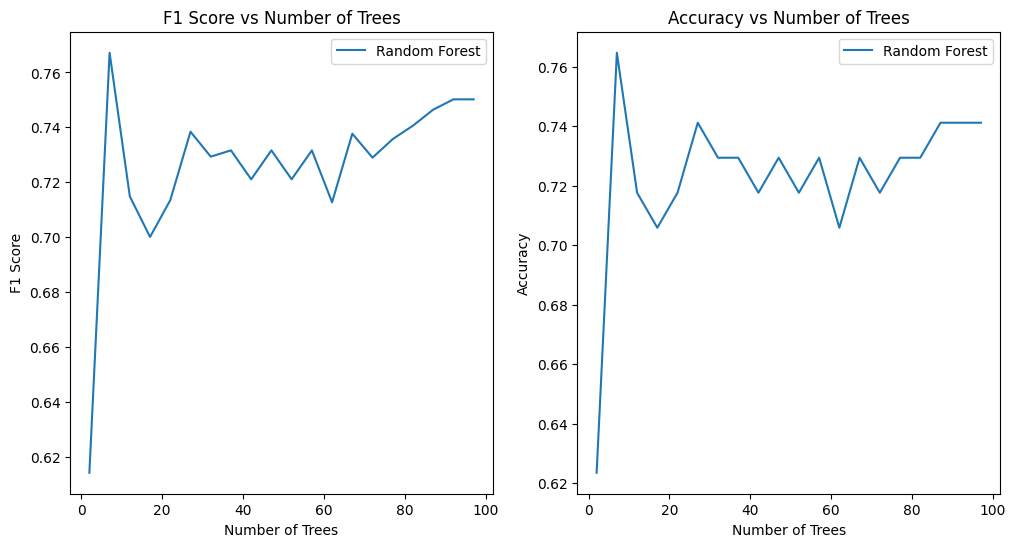

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1_scores_rf = []
accuracy_scores_rf = []

for n_estimators in range(2, 101, 5):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, np.array(y_train).ravel())
    y_test_pred_rf = rf.predict(X_test_scaled)

    f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
    accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

    f1_scores_rf.append(f1_rf)
    accuracy_scores_rf.append(accuracy_rf)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 101, 5), f1_scores_rf, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Trees')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 101, 5), accuracy_scores_rf, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.legend()

plt.show()


Для случайного леса и бэггинга выше в среднем достаточно 20-25 моделей для приблизительного выхода на плато

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

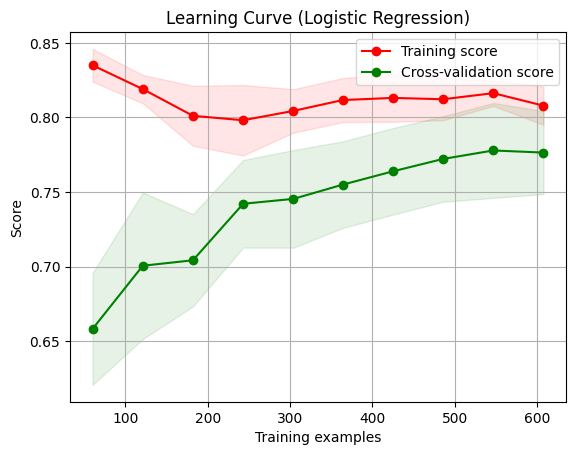

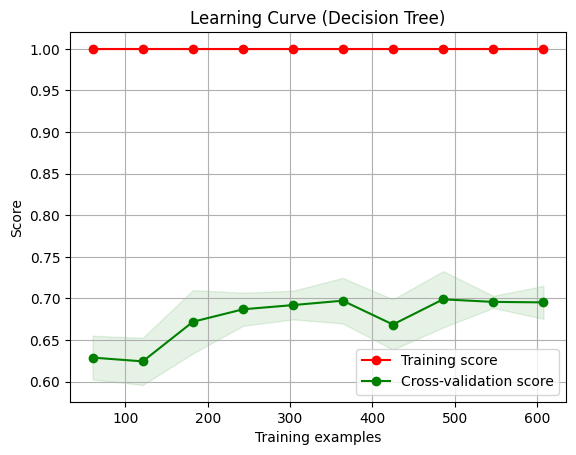

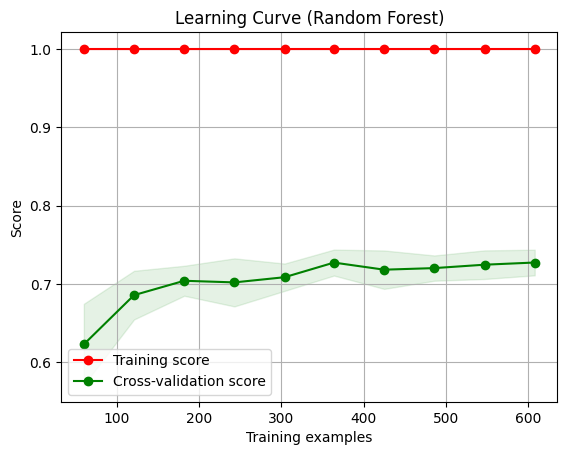

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
plot_learning_curve(logreg, "Learning Curve (Logistic Regression)", X_train_scaled, y_train, cv=5)

dtree = DecisionTreeClassifier(random_state=42)
plot_learning_curve(dtree, "Learning Curve (Decision Tree)", X_train_scaled, y_train, cv=5)

rf = RandomForestClassifier(random_state=42)
plot_learning_curve(rf, "Learning Curve (Random Forest)", X_train_scaled, y_train, cv=5)

plt.show()

Дерево и случа сразу же переобучились, мы можем это видеть с единичного значения training score.

Результаты логистической регрессии на кросс-валидации лучше

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* number of decision trees
* learning rate

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators':[50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

print("Оптимальные гиперпараметры:", grid_search.best_params_)


Оптимальные гиперпараметры: {'learning_rate': 0.3, 'n_estimators': 50}


In [ ]:
best_gb = grid_search.best_estimator_
best_gb.fit(X_train_scaled, y_train)

y_test_pred = best_gb.predict(X_test_scaled)


f1_test = f1_score(y_test, y_test_pred, average='macro')
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"F1 на тестовой выборке: {f1_test:.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.4f}")

F1 на тестовой выборке: 0.7479
Accuracy на тестовой выборке: 0.7412
